# Clustering with K-means and Gaussian Mixture model

Ex) Mall_Customers dataset

In [72]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

mall_data = pd.read_csv('../data/Mall_Customers.csv')
print('DataFrame shape {}: '.format(mall_data.shape))

DataFrame shape (200, 5): 


In [3]:
mall_data.sample(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
175,176,Female,30,88,86
36,37,Female,42,34,17
190,191,Female,34,103,23
51,52,Male,33,42,60
148,149,Female,34,78,22
55,56,Male,47,43,41
79,80,Female,49,54,42
65,66,Male,18,48,59
192,193,Male,33,113,8
103,104,Male,26,62,55


In [4]:
mall_data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
mall_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


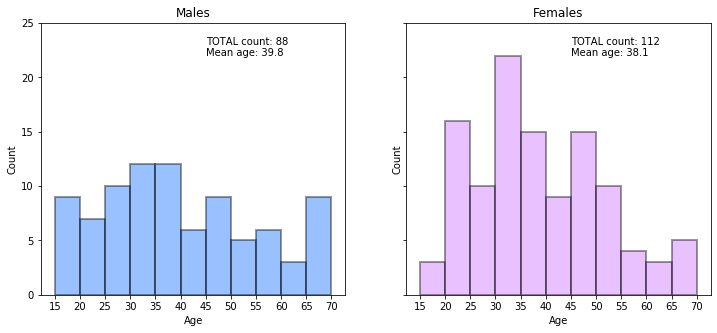

In [6]:
males_age = mall_data[mall_data['Gender']=='Male']['Age'] # subset with males age
females_age = mall_data[mall_data['Gender']=='Female']['Age'] # subset with females age

age_bins = range(15,75,5)

# males histogram
fig2, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5), sharey=True)
sns.distplot(males_age, bins=age_bins, kde=False, color='#0066ff', ax=ax1, hist_kws=dict(edgecolor="k", linewidth=2))
ax1.set_xticks(age_bins)
ax1.set_ylim(top=25)
ax1.set_title('Males')
ax1.set_ylabel('Count')
ax1.text(45,23, "TOTAL count: {}".format(males_age.count()))
ax1.text(45,22, "Mean age: {:.1f}".format(males_age.mean()))

# females histogram
sns.distplot(females_age, bins=age_bins, kde=False, color='#cc66ff', ax=ax2, hist_kws=dict(edgecolor="k", linewidth=2))
ax2.set_xticks(age_bins)
ax2.set_title('Females')
ax2.set_ylabel('Count')
ax2.text(45,23, "TOTAL count: {}".format(females_age.count()))
ax2.text(45,22, "Mean age: {:.1f}".format(females_age.mean()))

plt.show()

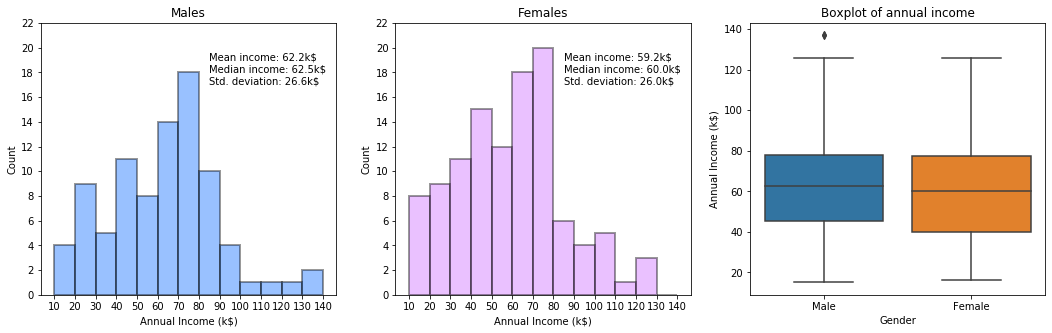

In [7]:
males_income = mall_data[mall_data['Gender']=='Male']['Annual Income (k$)'] # subset with males income
females_income = mall_data[mall_data['Gender']=='Female']['Annual Income (k$)'] # subset with females income

my_bins = range(10,150,10)

# males histogram
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18,5))
sns.distplot(males_income, bins=my_bins, kde=False, color='#0066ff', ax=ax1, hist_kws=dict(edgecolor="k", linewidth=2))
ax1.set_xticks(my_bins)
ax1.set_yticks(range(0,24,2))
ax1.set_ylim(0,22)
ax1.set_title('Males')
ax1.set_ylabel('Count')
ax1.text(85,19, "Mean income: {:.1f}k$".format(males_income.mean()))
ax1.text(85,18, "Median income: {:.1f}k$".format(males_income.median()))
ax1.text(85,17, "Std. deviation: {:.1f}k$".format(males_income.std()))

# females histogram
sns.distplot(females_income, bins=my_bins, kde=False, color='#cc66ff', ax=ax2, hist_kws=dict(edgecolor="k", linewidth=2))
ax2.set_xticks(my_bins)
ax2.set_yticks(range(0,24,2))
ax2.set_ylim(0,22)
ax2.set_title('Females')
ax2.set_ylabel('Count')
ax2.text(85,19, "Mean income: {:.1f}k$".format(females_income.mean()))
ax2.text(85,18, "Median income: {:.1f}k$".format(females_income.median()))
ax2.text(85,17, "Std. deviation: {:.1f}k$".format(females_income.std()))

# boxplot
sns.boxplot(x='Gender', y='Annual Income (k$)', data=mall_data, ax=ax3)
ax3.set_title('Boxplot of annual income')
plt.show()

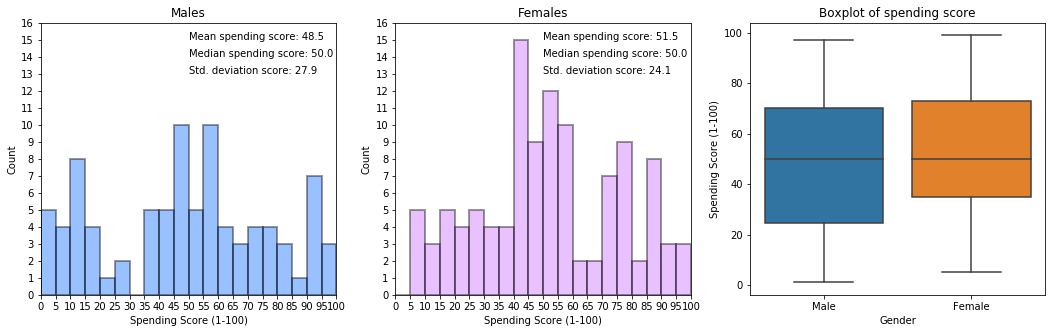

In [8]:
males_spending = mall_data[mall_data['Gender']=='Male']['Spending Score (1-100)'] # subset with males age
females_spending = mall_data[mall_data['Gender']=='Female']['Spending Score (1-100)'] # subset with females age

spending_bins = range(0,105,5)

# males histogram
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18,5))
sns.distplot(males_spending, bins=spending_bins, kde=False, color='#0066ff', ax=ax1, hist_kws=dict(edgecolor="k", linewidth=2))
ax1.set_xticks(spending_bins)
ax1.set_xlim(0,100)
ax1.set_yticks(range(0,17,1))
ax1.set_ylim(0,16)
ax1.set_title('Males')
ax1.set_ylabel('Count')
ax1.text(50,15, "Mean spending score: {:.1f}".format(males_spending.mean()))
ax1.text(50,14, "Median spending score: {:.1f}".format(males_spending.median()))
ax1.text(50,13, "Std. deviation score: {:.1f}".format(males_spending.std()))

# females histogram
sns.distplot(females_spending, bins=spending_bins, kde=False, color='#cc66ff', ax=ax2, hist_kws=dict(edgecolor="k", linewidth=2))
ax2.set_xticks(spending_bins)
ax2.set_xlim(0,100)
ax2.set_yticks(range(0,17,1))
ax2.set_ylim(0,16)
ax2.set_title('Females')
ax2.set_ylabel('Count')
ax2.text(50,15, "Mean spending score: {:.1f}".format(females_spending.mean()))
ax2.text(50,14, "Median spending score: {:.1f}".format(females_spending.median()))
ax2.text(50,13, "Std. deviation score: {:.1f}".format(females_spending.std()))

# boxplot
sns.boxplot(x='Gender', y='Spending Score (1-100)', data=mall_data, ax=ax3)
ax3.set_title('Boxplot of spending score')
plt.show()

plt.show()

In [9]:
medians_by_age_group = mall_data.groupby(["Gender",pd.cut(mall_data['Age'], age_bins)]).median()
medians_by_age_group.index = medians_by_age_group.index.set_names(['Gender', 'Age_group'])
medians_by_age_group.reset_index(inplace=True)

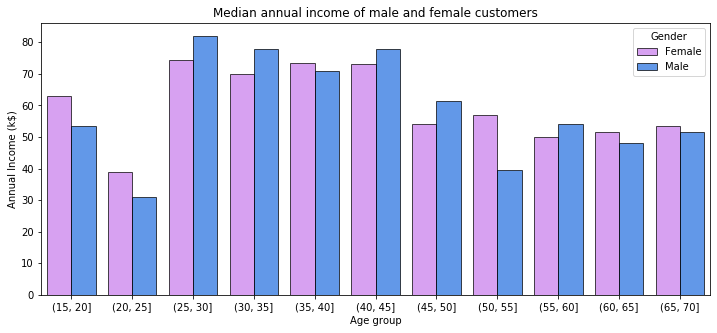

In [10]:
fig, ax = plt.subplots(figsize=(12,5))
sns.barplot(x='Age_group', y='Annual Income (k$)', hue='Gender', data=medians_by_age_group,
            palette=['#cc66ff','#0066ff'],
            alpha=0.7,edgecolor='k',
            ax=ax)
ax.set_title('Median annual income of male and female customers')
ax.set_xlabel('Age group')
plt.show()

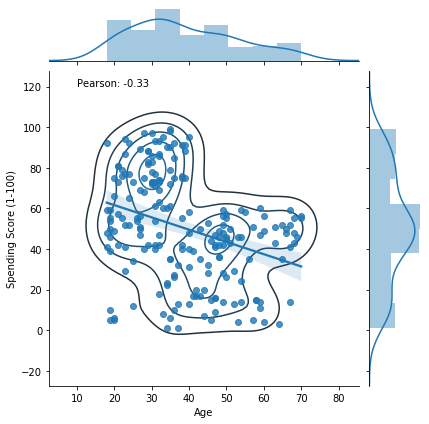

<Figure size 1080x720 with 0 Axes>

In [11]:
from scipy.stats import pearsonr

# calculating Pearson's correlation
corr, _ = pearsonr(mall_data['Age'], mall_data['Spending Score (1-100)'])

jp = (sns.jointplot('Age', 'Spending Score (1-100)', data=mall_data,
                    kind='reg')).plot_joint(sns.kdeplot, zorder=0, n_levels=6)


plt.text(10,120, 'Pearson: {:.2f}'.format(corr))
plt.figure(figsize=(15,10))
plt.show()

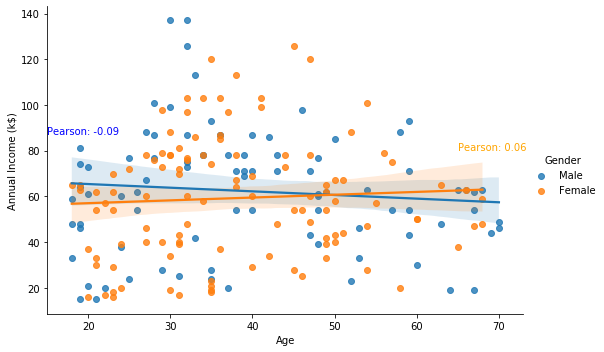

In [12]:
# calculating Pearson's correlations
corr1, _ = pearsonr(males_age.values, males_income.values)
corr2, _ = pearsonr(females_age.values, females_income.values)

sns.lmplot('Age', 'Annual Income (k$)', data=mall_data, hue='Gender',
          aspect=1.5)

plt.text(15,87, 'Pearson: {:.2f}'.format(corr1), color='blue')
plt.text(65,80, 'Pearson: {:.2f}'.format(corr2), color='orange')

plt.show()

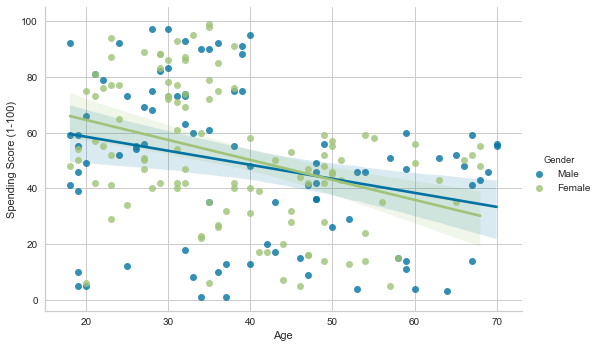

In [73]:
# calculating Pearson's correlations
corr1, _ = pearsonr(males_age.values, males_spending.values)
corr2, _ = pearsonr(females_age.values, females_spending.values)

sns.lmplot('Age', 'Spending Score (1-100)', data=mall_data, hue='Gender',
          aspect=1.5)
plt.show()

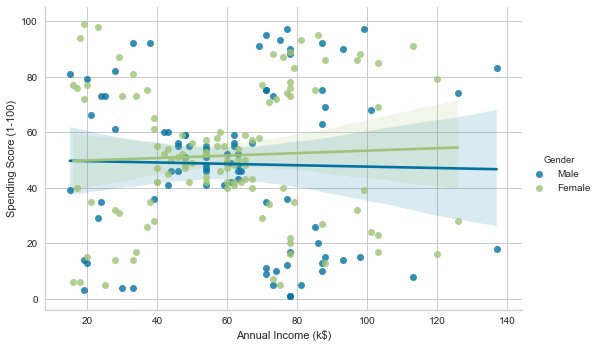

In [74]:
# calculating Pearson's correlations
corr1, _ = pearsonr(males_income.values, males_spending.values)
corr2, _ = pearsonr(females_income.values, females_spending.values)

sns.lmplot('Annual Income (k$)', 'Spending Score (1-100)', data=mall_data, hue='Gender',
          aspect=1.5)


plt.show()

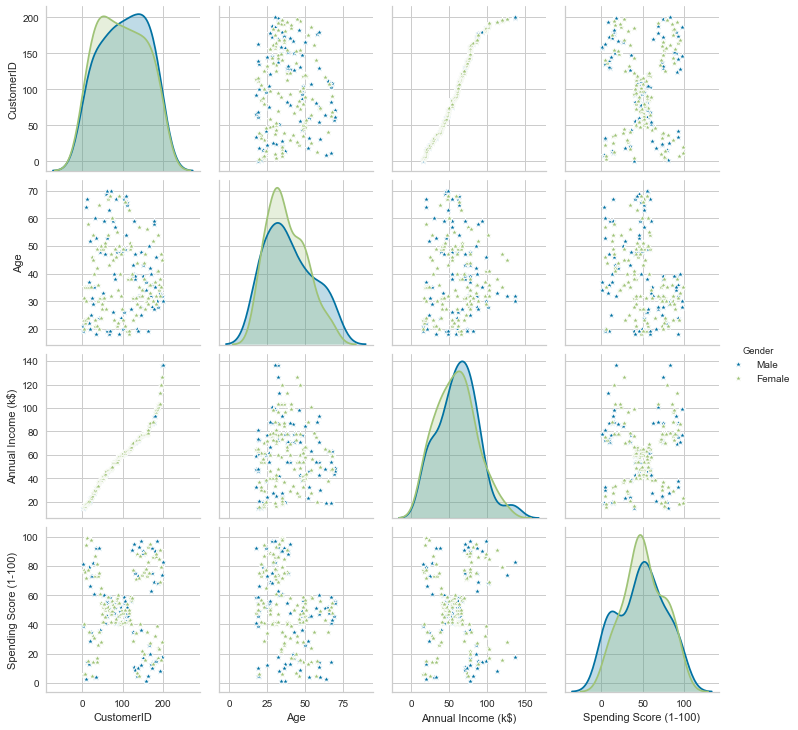

In [20]:
_ = sns.pairplot(mall_data, hue='Gender', markers='*')
plt.show()

## K-means clustering

In [75]:
from sklearn.cluster import KMeans 

In [ ]:
# subset with numeric variables only
X_numerics = mall_data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']] 

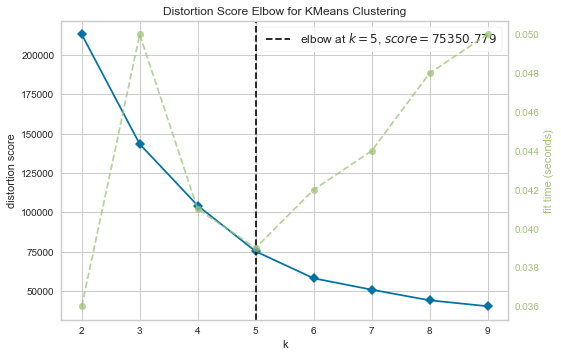

In [19]:
from yellowbrick.cluster import KElbowVisualizer

model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2,10))

visualizer.fit(X_numerics)
visualizer.show()
plt.show()

5 clusters

In [21]:
KM_5_clusters = KMeans(n_clusters=5, init='k-means++').fit(X_numerics) # initialise and fit K-Means model

KM5_clustered = X_numerics.copy()
KM5_clustered.loc[:,'Cluster'] = KM_5_clusters.labels_ # append labels to points

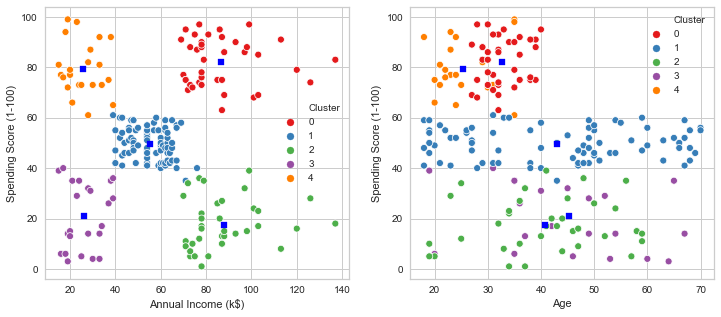

In [22]:
fig1, (axes) = plt.subplots(1,2,figsize=(12,5))
scat_1 = sns.scatterplot('Annual Income (k$)', 'Spending Score (1-100)', data=KM5_clustered,
                hue='Cluster', ax=axes[0], palette='Set1', legend='full')

sns.scatterplot('Age', 'Spending Score (1-100)', data=KM5_clustered,
                hue='Cluster', palette='Set1', ax=axes[1], legend='full')

axes[0].scatter(KM_5_clusters.cluster_centers_[:,1],KM_5_clusters.cluster_centers_[:,2],
                marker='s', s=40, c="blue")
axes[1].scatter(KM_5_clusters.cluster_centers_[:,0],KM_5_clusters.cluster_centers_[:,2],
                marker='s', s=40, c="blue")
plt.show()

In [23]:
KM_clust_sizes = KM5_clustered.groupby('Cluster').size().to_frame()
KM_clust_sizes.columns = ["KM_size"]
KM_clust_sizes

,KM_size
Cluster,
0,39
1,80
2,36
3,23
4,22


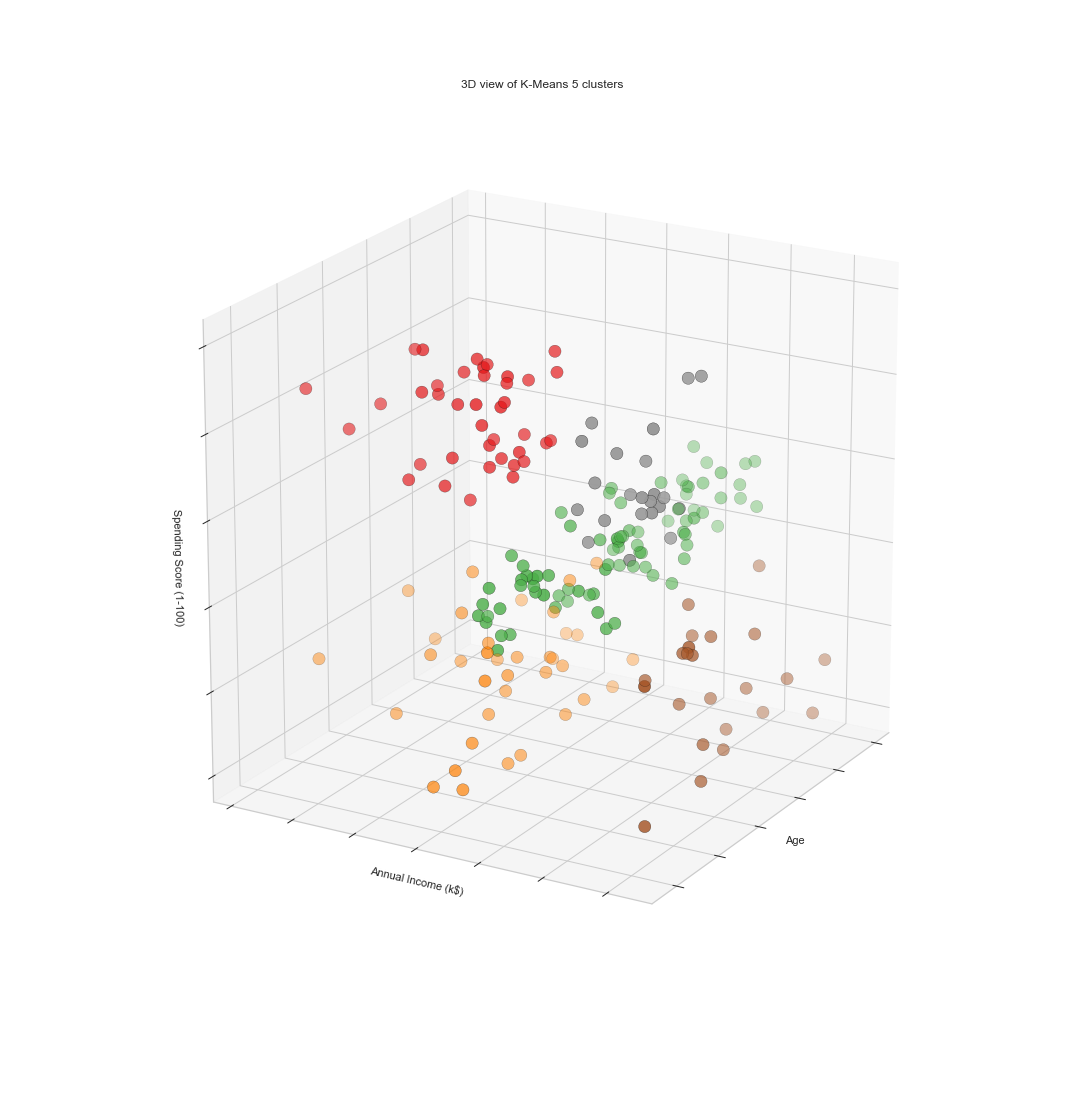

In [76]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(15, 15))
ax = Axes3D(fig, rect=[0, 0, .99, 1], elev=20, azim=210)
ax.scatter(KM5_clustered['Age'],
           KM5_clustered['Annual Income (k$)'],
           KM5_clustered['Spending Score (1-100)'],
           c=KM5_clustered['Cluster'],
           s=150, edgecolor='k', cmap=plt.cm.Set1)

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
ax.set_title('3D view of K-Means 5 clusters')
ax.dist = 12

plt.show()

In [30]:
!pip install plotly

     --------------------------------------- 15.2/15.2 MB 10.9 MB/s eta 0:00:00


In [78]:
import plotly as py
import plotly.graph_objs as go

def tracer(db, n, name):
    '''
    This function returns trace object for Plotly
    '''
    return go.Scatter3d(
        x = db[db['Cluster']==n]['Age'],
        y = db[db['Cluster']==n]['Spending Score (1-100)'],
        z = db[db['Cluster']==n]['Annual Income (k$)'],
        mode = 'markers',
        name = name,
        marker = dict(
            size = 2
        )
     )

trace0 = tracer(KM5_clustered, 0, 'Cluster 0')
trace1 = tracer(KM5_clustered, 1, 'Cluster 1')
trace2 = tracer(KM5_clustered, 2, 'Cluster 2')
trace3 = tracer(KM5_clustered, 3, 'Cluster 3')
trace4 = tracer(KM5_clustered, 4, 'Cluster 4')

data = [trace0, trace1, trace2, trace3, trace4]

layout = go.Layout(
    title = 'Clusters by K-Means',
    scene = dict(
            xaxis = dict(title = 'Age'),
            yaxis = dict(title = 'Spending Score'),
            zaxis = dict(title = 'Annual Income')
        )
)

fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)

In [34]:
KM_6_clusters = KMeans(n_clusters=6, init='k-means++').fit(X_numerics) # initialise and fit K-Means model

KM6_clustered = X_numerics.copy()
KM6_clustered.loc[:,'Cluster'] = KM_6_clusters.labels_ # append labels to points

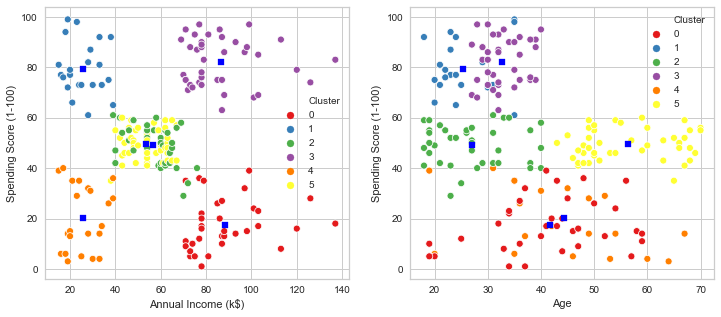

In [36]:
fig11, (axes) = plt.subplots(1,2,figsize=(12,5))

sns.scatterplot('Annual Income (k$)', 'Spending Score (1-100)', data=KM6_clustered,
                hue='Cluster', ax=axes[0], palette='Set1', legend='full')

sns.scatterplot('Age', 'Spending Score (1-100)', data=KM6_clustered,
                hue='Cluster', palette='Set1', ax=axes[1], legend='full')

# plotting centroids
axes[0].scatter(KM_6_clusters.cluster_centers_[:,1], KM_6_clusters.cluster_centers_[:,2], marker='s', s=40, c="blue")
axes[1].scatter(KM_6_clusters.cluster_centers_[:,0], KM_6_clusters.cluster_centers_[:,2], marker='s', s=40, c="blue")
plt.show()

In [37]:
KM6_clust_sizes = KM6_clustered.groupby('Cluster').size().to_frame()
KM6_clust_sizes.columns = ["KM_size"]
KM6_clust_sizes

,KM_size
Cluster,
0,35
1,22
2,38
3,39
4,22
5,44


In [79]:
# Plotly interactive 3D plot

trace0 = tracer(KM6_clustered, 0, 'Cluster 0')
trace1 = tracer(KM6_clustered, 1, 'Cluster 1')
trace2 = tracer(KM6_clustered, 2, 'Cluster 2')
trace3 = tracer(KM6_clustered, 3, 'Cluster 3')
trace4 = tracer(KM6_clustered, 4, 'Cluster 4')
trace5 = tracer(KM6_clustered, 5, 'Cluster 5')

data = [trace0, trace1, trace2, trace3, trace4, trace5]

layout = go.Layout(
    title = 'Clusters by K-Means',
    scene = dict(
            xaxis = dict(title = 'Age'),
            yaxis = dict(title = 'Spending Score'),
            zaxis = dict(title = 'Annual Income'),
        )
)

fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)

### Gaussian mixture model

In [86]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=5)

In [87]:
gmm.fit(X_numerics)
gmm_y_pred = gmm.predict(X_numerics)

In [88]:
gmm_data = X_numerics.copy()
gmm_data.loc[:,'Cluster'] = gmm_y_pred # append labels to points

In [89]:
gmm_mean = gmm.means_
gmm_mean

array([[ 24.54677277,  43.58912984,  62.25423218],
       [ 49.96607256,  46.00856905,  40.88207652],
       [ 32.34808438, 102.00067944,  83.94152512],
       [ 41.9239442 ,  88.31745158,  17.33113686],
       [ 32.89465351,  77.17195546,  81.01473711]])

In [90]:
gmm.covariances_

array([[[  25.33930074,  -18.38789442,   13.12766209],
        [ -18.38789442,  327.78636074, -275.51475142],
        [  13.12766209, -275.51475142,  324.58675303]],

       [[ 152.12602572,   51.70513154,   33.09940721],
        [  51.70513154,  235.27924376,  172.18218464],
        [  33.09940721,  172.18218464,  246.13792886]],

       [[   9.14441565,    3.78790496,    8.16949476],
        [   3.78790496,  252.78290885,  -43.80906453],
        [   8.16949476,  -43.80906453,   79.6682453 ]],

       [[ 112.08169536,   -4.48183461,   24.66528364],
        [  -4.48183461,  268.77059635,   35.22081924],
        [  24.66528364,   35.22081924,  102.0787146 ]],

       [[  16.16826134,   -9.18360571,    2.5732216 ],
        [  -9.18360571,   30.69144708,   -9.75177806],
        [   2.5732216 ,   -9.75177806,   87.37357703]]])

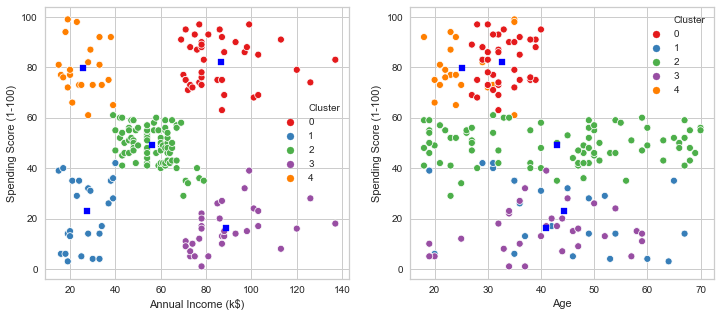

In [54]:
fig, (axes) = plt.subplots(1,2,figsize=(12,5))

sns.scatterplot('Annual Income (k$)', 'Spending Score (1-100)', data=gmm_data,
                hue='Cluster', ax=axes[0], palette='Set1', legend='full')

sns.scatterplot('Age', 'Spending Score (1-100)', data=gmm_data,
                hue='Cluster', palette='Set1', ax=axes[1], legend='full')
# plotting centroids
axes[0].scatter(gmm_mean[:,1], gmm_mean[:,2], marker='s', s=40, c="blue")
axes[1].scatter(gmm_mean[:,0], gmm_mean[:,2], marker='s', s=40, c="blue")
plt.show()
plt.show()

In [55]:
gmm_sizes = gmm_data.groupby('Cluster').size().to_frame()
gmm_sizes.columns = ["GMM_size"]
gmm_sizes

,GMM_size
Cluster,
0,39
1,25
2,82
3,32
4,22


In [84]:
import plotly as py
import plotly.graph_objs as go

def tracer(db, n, name):
    '''
    This function returns trace object for Plotly
    '''
    return go.Scatter3d(
        x = db[db['Cluster']==n]['Age'],
        y = db[db['Cluster']==n]['Spending Score (1-100)'],
        z = db[db['Cluster']==n]['Annual Income (k$)'],
        mode = 'markers',
        name = name,
        marker = dict(
            size = 2
        )
     )

trace0 = tracer(gmm_data, 0, 'Cluster 0')
trace1 = tracer(gmm_data, 1, 'Cluster 1')
trace2 = tracer(gmm_data, 2, 'Cluster 2')
trace3 = tracer(gmm_data, 3, 'Cluster 3')
trace4 = tracer(gmm_data, 4, 'Cluster 4')

data = [trace0, trace1, trace2, trace3, trace4]

layout = go.Layout(
    title = 'Clusters by GMM',
    scene = dict(
            xaxis = dict(title = 'Age'),
            yaxis = dict(title = 'Spending Score'),
            zaxis = dict(title = 'Annual Income')
        )
)

fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)

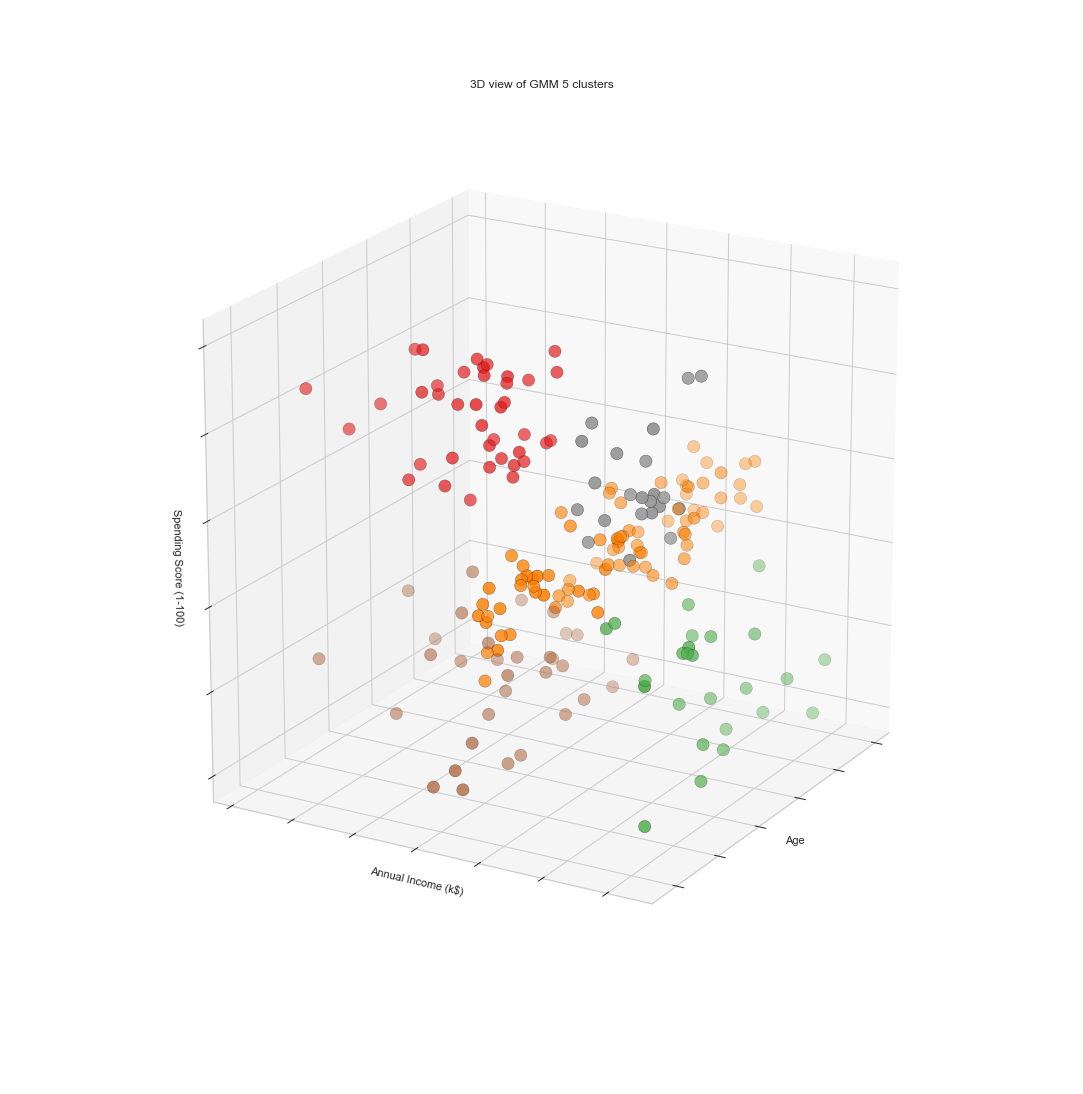

In [58]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(15, 15))
ax = Axes3D(fig, rect=[0, 0, .99, 1], elev=20, azim=210)
ax.scatter(gmm_data['Age'],
           gmm_data['Annual Income (k$)'],
           gmm_data['Spending Score (1-100)'],
           c=gmm_data['Cluster'],
           s=150, edgecolor='k', cmap=plt.cm.Set1)

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
ax.set_title('3D view of GMM 5 clusters')
ax.dist = 12

plt.show()

6 clusters

In [92]:
gmm = GaussianMixture(n_components=6, init_params= KMeans)
gmm.fit(X_numerics)
gmm_y_pred = gmm.predict(X_numerics)

In [93]:
gmm_data = X_numerics.copy()
gmm_data.loc[:,'Cluster'] = gmm_y_pred # append labels to points

In [94]:
gmm_sizes = gmm_data.groupby('Cluster').size().to_frame()
gmm_sizes.columns = ["GMM_size"]
gmm_sizes

,GMM_size
Cluster,
0,39
1,23
2,52
3,19
4,33
5,34


In [95]:
gmm_mean = gmm.means_

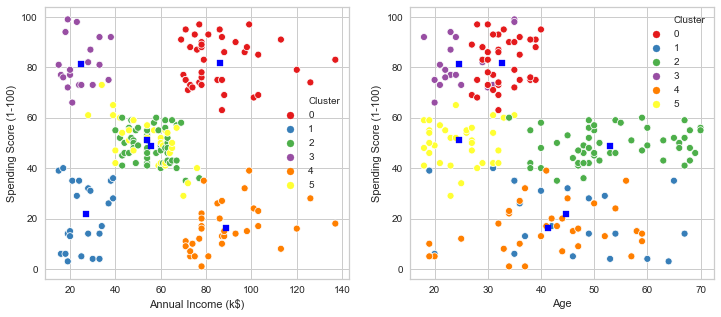

In [98]:
fig, (axes) = plt.subplots(1,2,figsize=(12,5))

sns.scatterplot('Annual Income (k$)', 'Spending Score (1-100)', data=gmm_data,
                hue='Cluster', ax=axes[0], palette='Set1', legend='full')

sns.scatterplot('Age', 'Spending Score (1-100)', data=gmm_data,
                hue='Cluster', palette='Set1', ax=axes[1], legend='full')
# plotting centroids
axes[0].scatter(gmm_mean[:,1], gmm_mean[:,2], marker='s', s=40, c="blue")
axes[1].scatter(gmm_mean[:,0], gmm_mean[:,2], marker='s', s=40, c="blue")
plt.show()
plt.show()

In [99]:
# Plotly interactive 3D plot

trace0 = tracer(gmm_data, 0, 'Cluster 0')
trace1 = tracer(gmm_data, 1, 'Cluster 1')
trace2 = tracer(gmm_data, 2, 'Cluster 2')
trace3 = tracer(gmm_data, 3, 'Cluster 3')
trace4 = tracer(gmm_data, 4, 'Cluster 4')
trace5 = tracer(gmm_data, 5, 'Cluster 5')

data = [trace0, trace1, trace2, trace3, trace4, trace5]

layout = go.Layout(
    title = 'Clusters by GMM',
    scene = dict(
            xaxis = dict(title = 'Age'),
            yaxis = dict(title = 'Spending Score'),
            zaxis = dict(title = 'Annual Income'),
        )
)

fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)

In [111]:
gmm = GaussianMixture(n_components=6, init_params= 'random')
gmm.fit(X_numerics)
gmm_y_pred = gmm.predict(X_numerics)

In [112]:
gmm_data = X_numerics.copy()
gmm_data.loc[:,'Cluster'] = gmm_y_pred # append labels to points

In [113]:
gmm_sizes = gmm_data.groupby('Cluster').size().to_frame()
gmm_sizes.columns = ["GMM_size"]
gmm_sizes

,GMM_size
Cluster,
0,45
1,40
2,41
3,39
4,21
5,14


In [114]:
gmm_mean = gmm.means_

In [115]:
# Plotly interactive 3D plot

trace0 = tracer(gmm_data, 0, 'Cluster 0')
trace1 = tracer(gmm_data, 1, 'Cluster 1')
trace2 = tracer(gmm_data, 2, 'Cluster 2')
trace3 = tracer(gmm_data, 3, 'Cluster 3')
trace4 = tracer(gmm_data, 4, 'Cluster 4')
trace5 = tracer(gmm_data, 5, 'Cluster 5')

data = [trace0, trace1, trace2, trace3, trace4, trace5]

layout = go.Layout(
    title = 'Clusters by GMM',
    scene = dict(
            xaxis = dict(title = 'Age'),
            yaxis = dict(title = 'Spending Score'),
            zaxis = dict(title = 'Annual Income'),
        )
)

fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)